<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-1/blob/main/Parcial_3_Se%C3%B1ales_y_Sistemas_JLPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial #3 Señales y Sistemas 2024-1 JUAN LEANDRO PARRA ARIAS_1002653993

#Punto 1

Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura (asuma condiciones iniciales cero):

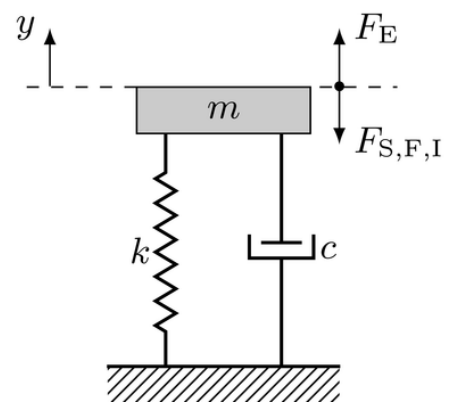

Luego, encuentre el sistema equivalente a partir de un circuito RLC (entrada de tension - salida tensión del capacitor). Finalmente, desde el modelado desarrollado, presente un dashboard que permita simular el sistema como subamortiguado, con amortiguamiento crítico, sobreamortiguado, oscilatorio e inestable. El usuario podra determinar el valor del factor de amortiguamiento y la simulacion deberá determinar los valores de m, k y c y sus equivalentes R, L y C.

Además de estimar el tipo de amortiguamiento. Asimismo,
deberá presentar las gráficas de polos y ceros, diagrama de Bode, respuesta impulso y respuesta al escalon. Nota: Para las gráficas de Bode, respuesta impulso y respuesta al escalón, se sugiere utilizar la API de control de Sympy, a partir de los cuadernos guía: Pendulo elástico y SLIT y fracciones parciales.

##Simulación

El código !pip install sympy --upgrade actualiza la biblioteca Sympy a la última versión disponible. Esto es necesario para asegurarse de que se puedan utilizar todas las funcionalidades más recientes del módulo de control dentro de Sympy, lo que permite realizar análisis y simulaciones de sistemas de control de manera efectiva.

In [1]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

En este código %matplotlib inline permite que las gráficas de Matplotlib se muestren directamente en un cuaderno Jupyter, facilitando la visualización de los gráficos generados. Luego, se importan las bibliotecas NumPy y Matplotlib para realizar cálculos numéricos y generar gráficos, respectivamente. A continuación, se inicializa Sympy, que es una biblioteca para matemáticas simbólicas, permitiendo realizar cálculos algebraicos y manipular expresiones matemáticas. Se definen las variables simbólicas t, m, c y k como reales y positivas, junto con la variable compleja s, que se utilizará en el análisis de sistemas de control.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

El código define los coeficientes de un sistema en forma canónica, utilizando las variables simbólicas previamente definidas. Aquí, $a2$ se asigna a la masa $m$, $a1$ al coeficiente de amortiguamiento $c$ y $ao$ a la rigidez $k$. Luego, se calcula la ganancia del sistema $Ko$ como el inverso de $ao$. La frecuencia natural $wn$ se calcula como la raíz cuadrada de $ao/a2$, y el coeficiente de amortiguamiento xi se determina como $a1$ dividido por 2 veces la raíz cuadrada de $ao$ y $a2$.

Finalmente, se construye la función de transferencia $H$ del sistema, que es una expresión que relaciona la entrada y salida del sistema en el dominio de Laplace. La expresión de $H$ se muestra en función de $s$, donde el numerador representa la ganancia del sistema multiplicada por el cuadrado de la frecuencia natural, y el denominador incluye términos relacionados con el amortiguamiento y la frecuencia natural.


In [3]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

El código calcula los polos del sistema, que son valores complejos que determinan la estabilidad y el comportamiento del sistema en el dominio de Laplace. Se definen dos polos, $p_1$ y $p_2$, utilizando el coeficiente de amortiguamiento $\xi$ y la frecuencia natural $\omega_n$.

El primer polo $p_1$ se calcula como $$-\xi \cdot \omega_n + j \cdot \omega_n \cdot \sqrt{1 - \xi^2}$$ donde $j$ es la unidad imaginaria. Este término captura la parte real del polo, que está relacionada con el amortiguamiento, y la parte imaginaria, que está relacionada con la frecuencia oscilatoria del sistema. La variable $p_1$ se utiliza para analizar la estabilidad del sistema y su respuesta temporal.


In [4]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱     2       
                    ╱     c        
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m               √m             

En este código se define un diccionario llamado $mck$ para reemplazar los valores de las variables $m$ (masa), $c$ (amortiguamiento) y $k$ (rigidez) en las ecuaciones. En este caso, se asignan los siguientes valores:

- $m = 4.0$
- $c = 1.0$
- $k = 1.0$

Este diccionario facilita la evaluación de expresiones simbólicas al sustituir las variables por sus valores numéricos específicos.


In [5]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

###Polos y ceros

En este código se imprime el resultado de las siguientes expresiones al reemplazar los valores definidos en el diccionario $mck$:

- $p1$: El primer polo del sistema.
- $p2$: El segundo polo del sistema.
- $\xi$: El coeficiente de amortiguamiento.
- $\omega_n$: La frecuencia natural del sistema.

Esto permite obtener los valores numéricos correspondientes a los polos y características del sistema de control de segundo orden.


In [6]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


Este código importa el paquete de control de Sympy para graficar los polos y ceros del sistema. A continuación, se define la función de transferencia $H$ utilizando los valores numéricos evaluados de $m$, $c$ y $k$.

Se utiliza `TransferFunction` para crear la función de transferencia $tf1$ y luego se genera el gráfico de polos y ceros con `pole_zero_plot(tf1)`. Esta gráfica es útil para visualizar la estabilidad y el comportamiento dinámico del sistema de control.


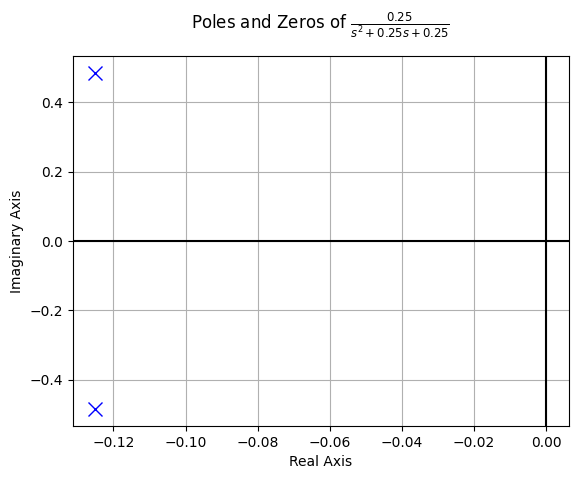

In [7]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

En este código se utiliza `bode_plot(tf1)` para generar el diagrama de Bode de la función de transferencia $tf1$. Este diagrama muestra la respuesta en frecuencia del sistema, representando tanto la magnitud como la fase a lo largo de diferentes frecuencias. El diagrama de Bode es esencial para analizar la estabilidad y el comportamiento en frecuencia de sistemas de control.


###Diagrama de Bode

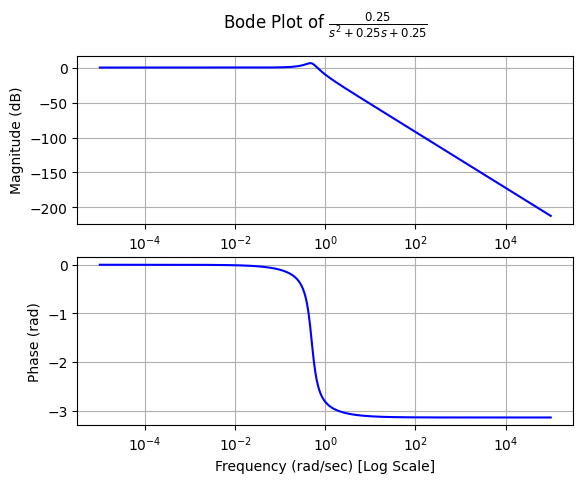

In [8]:
bode_plot(tf1)

###Respuesta impulso

En este código se utiliza `impulse_response_plot(tf1, upper_limit=5/(xi.subs(mck)*wn.subs(mck)))` para graficar la respuesta al impulso de la función de transferencia $tf1$. Esta gráfica muestra cómo reacciona el sistema ante una entrada de impulso unitario, y el parámetro `upper_limit` define el límite superior del tiempo para la visualización. La respuesta al impulso es fundamental para entender la dinámica del sistema y su comportamiento temporal.


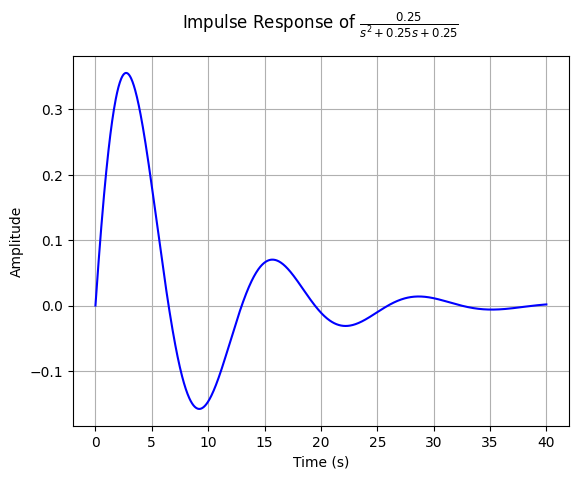

In [9]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

###Respuesta escalón

En este código se utiliza `step_response_plot(tf1, upper_limit=5/(xi.subs(mck)*wn.subs(mck)))` para graficar la respuesta al escalón de la función de transferencia \(tf1\). Esta gráfica muestra cómo el sistema responde a una entrada de escalón unitario a lo largo del tiempo. Al igual que en la respuesta al impulso, el parámetro `upper_limit` establece el límite superior del tiempo para la visualización, permitiendo analizar la estabilización y el comportamiento del sistema después de un cambio abrupto en la entrada.


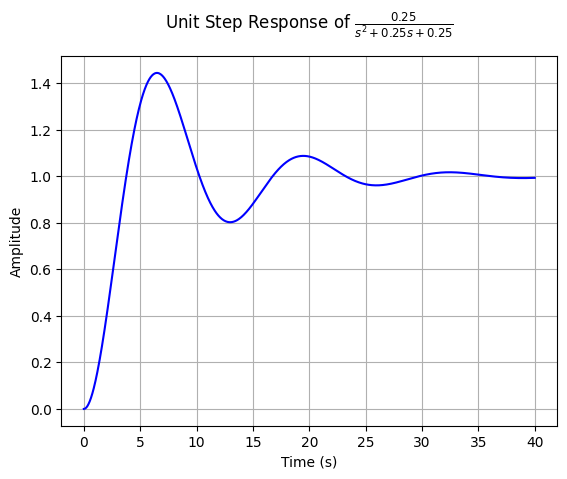

In [10]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#Punto 2

Sea la señal portadora $c(t) = A_c \sin(2\pi F_c t)$, con $A_c, F_c \in \mathbb{R}$, y la señal mensaje $m(t) \in \mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud AM, $y(t) = \left(1 + \frac{m(t)}{A_c}\right) c(t)$.

Luego, descargue desde YouTube 5 segundos de su canción favorita. Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Posteriormente, a partir del esquema de la siguiente figura:

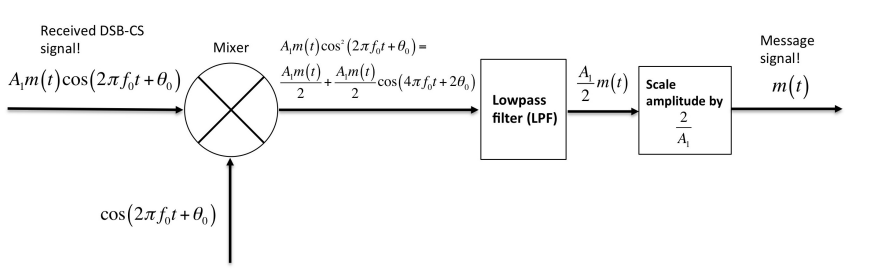

y asumiendo $\theta_0 = 0$, presente una simulacion sobre Python para el proceso de demodulacion en amplitud. Especifique adecuadamente las consideraciones de diseno en tiempo y en frecuencia (con las graficas pertinentes), y reproduzca el segmento de la cancion para cada una de las etapas del sistema de modulacion y demodulación. Tenga en cuenta el diseño de un filtro digital pasa bajas en la etapa de demodulacion, utilizando Transformada Z. Presente la grafica de polos y ceros y el diagrama de Bode del filtro (se sugiere tener en cuenta el cuaderno Transformada Z).
Finalmente, la simulacion tipo dashboard deberá también permitir la reproduccion de los fragmentos de audio del mensaje, portadora y senal modulada, y detectar el tipo de genero musical del audio empleado. Para ello se deben escoger al menos dos generos musicales en la etapa de entrenamiento del sistema. Nota: se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de modulacion deseado.

##Simulación

Este código realiza varias acciones. Primero, instala la API `yt-dlp`, que es una herramienta para descargar videos y audio desde YouTube y otras plataformas, utilizando la línea `!pip install yt-dlp`. Luego, define el enlace de la canción que se desea descargar con `link = "https://youtu.be/PVFmxb4M-PQ"` y utiliza el comando `!yt-dlp --extract-audio --audio-format mp3 -o "mi_cancion.mp3" {link}` para descargar el audio en formato MP3, guardándolo como `mi_cancion.mp3`. A continuación, verifica que el archivo se haya descargado correctamente utilizando `!ls`, que lista los archivos en el directorio actual. Finalmente, convierte el archivo MP3 a formato WAV con el comando `!ffmpeg -i "mi_cancion.mp3" "output.wav"`, guardando el resultado como `output.wav`.


In [11]:
# Instalar api yt-dlp
!pip install yt-dlp

# Descargar canción de interés
link = "https://youtu.be/PVFmxb4M-PQ"
!yt-dlp --extract-audio --audio-format mp3 -o "mi_cancion.mp3" {link}

# Verificar archivos en el directorio actual
!ls

# Convertir a .wav con ffmpeg
!ffmpeg -i "mi_cancion.mp3" "output.wav"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.8 MB/s eta 0:00:00
[youtube] Extracting URL: https://youtu.be/PVFmxb4M-PQ
[youtube] PVFmxb4M-PQ: Downloading webpage
[youtube] PVFmxb4M-PQ: Downloading ios player API JSON
[youtube] PVFmxb4M-PQ: Downloading web creator player API JSON
[youtube] PVFmxb4M-PQ: Downloading player d9418494
[youtube] PVFmxb4M-PQ: Downloading m3u8 information
[info] PVFmxb4M-PQ: Downloading 1 format(s): 251
[download] Destination: mi_cancion.webm
[download] 100% of    4.64MiB in 00:00:00 at 21.50MiB/s
[ExtractAudio] Destination: mi_cancion.mp3
Deleting original 

Este código instala la biblioteca `soundfile`, que es utilizada para leer y escribir archivos de audio en formato WAV y otros formatos. Al ejecutar el comando `!pip install soundfile`, se asegura que la biblioteca esté disponible en el entorno de trabajo, lo que permite cargar y manipular archivos de audio en proyectos que requieren el manejo de datos sonoros.


In [12]:
#instalar soundfile para cargar .wav
!pip install soundfile

Este código importa la biblioteca `soundfile` para trabajar con archivos de audio y `IPython.display.Audio` para reproducir audio en un entorno interactivo. A continuación, lee un archivo WAV llamado "output.wav" utilizando la función `sf.read`, que devuelve la señal de audio y la frecuencia de muestreo. Finalmente, imprime la frecuencia de muestreo y el nombre del archivo de audio en la consola, lo que proporciona información sobre el audio cargado.


In [13]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


En este fragmento de código, se realiza una copia de la señal de audio original `xa` y se almacena en la variable `xpro` para su posterior procesamiento. Se definen los tiempos de inicio `ti` y final `tf` en segundos, que indican el segmento de la canción que se desea procesar. A continuación, se extrae la señal de mensaje correspondiente a este intervalo de tiempo, seleccionando los valores de `xpro` entre los índices calculados a partir de la frecuencia de muestreo `fs`. La señal extraída se guarda en la variable `m`, que representa el primer canal del audio durante los cinco segundos especificados.


In [14]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

Este código utiliza la biblioteca `IPython.display` para reproducir el fragmento de audio que ha sido extraído previamente y almacenado en la variable `m`. La función `Audio()` toma como argumentos la señal de audio `m` y la frecuencia de muestreo `fs`, permitiendo escuchar el segmento específico de la canción que se ha seleccionado para su análisis. Al ejecutarse, se genera un reproductor de audio en la interfaz, facilitando la escucha del fragmento original.

In [15]:
#reproducir fragmento original #señal mensaje
Audio(m,rate=fs)

Este código crea un gráfico de la señal mensaje en el dominio del tiempo. Primero, se genera un vector de tiempo `tt` que abarca desde `ti` hasta `tf` con incrementos de $\frac{1}{fs}$, donde `fs` es la frecuencia de muestreo. Luego, se utiliza `plt.plot()` para graficar la señal `m` contra el vector de tiempo `tt`. Finalmente, se etiquetan los ejes con "tiempo [s]" y "m(t)", y se muestra el gráfico. Esto permite visualizar cómo varía la señal a lo largo del tiempo.


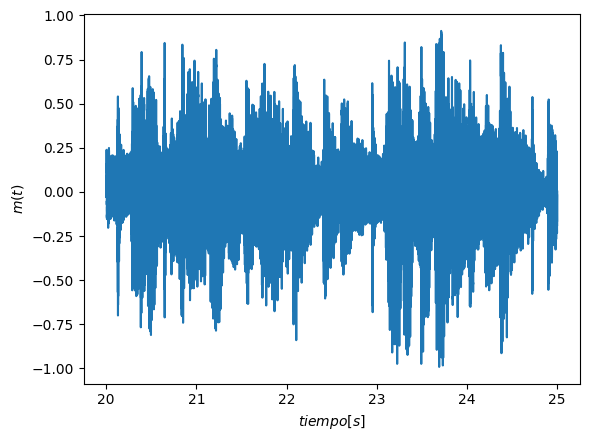

In [16]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

Este bloque de código realiza el análisis de Fourier de la señal mensaje, permitiendo obtener su representación en el dominio de la frecuencia. Primero, se calcula la Transformada Rápida de Fourier (FFT) de la señal `m` utilizando `np.fft.rfft(m)`, lo que da como resultado `Mw`, que contiene la información de frecuencia de la señal. Luego, se genera un vector de frecuencias `vf` con `np.fft.rfftfreq(m.shape[0], 1/fs)`, que corresponde a las frecuencias asociadas a cada componente de la FFT.

A continuación, se grafican dos cosas: primero, la magnitud del espectro de la señal mensaje con `plt.plot(vf, abs(Mw))`, etiquetando los ejes como frecuencia en Hertz (Hz) y la magnitud del espectro. Después, se grafica la fase del espectro con `plt.plot(vf, np.angle(Mw))`, donde se etiquetan los ejes como frecuencia y la fase de la señal. Estas gráficas permiten visualizar tanto la amplitud como la fase de la señal mensaje en el dominio de la frecuencia.


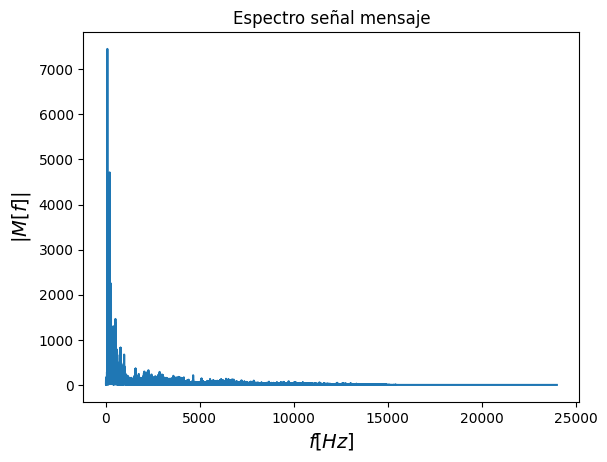

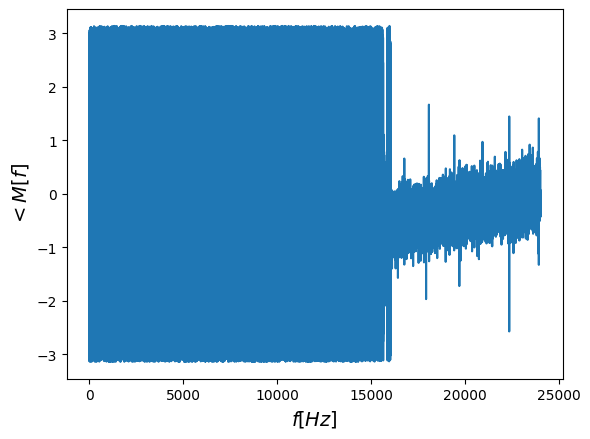

In [17]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

En este fragmento de código, se define la frecuencia portadora `Fo` como 15,000 Hz. Luego, se genera la señal de la portadora `c` utilizando la función coseno, que se calcula con `np.cos(2*np.pi*Fo*tt)`. Aquí, `tt` representa el vector de tiempo que se había creado previamente. Esta señal portadora es esencial para la modulación en amplitud (AM), ya que se utilizará para combinarse con la señal mensaje, permitiendo que la información se transmita a través de diferentes frecuencias.


In [18]:
Fo = 15000 #frecuencia portadora
c = np.cos(2*np.pi*Fo*tt) #portadora

En este segmento de código, se reproduce la señal portadora `c` utilizando la función `Audio` de la biblioteca `IPython.display`. Al llamar a `Audio(c, rate=fs)`, se establece la frecuencia de muestreo `fs`, que fue previamente determinada al leer el archivo de audio. Esto permite escuchar la señal portadora, la cual es una onda de coseno que servirá como base para la modulación en amplitud (AM) de la señal mensaje.


In [19]:
#repoducir portadora
Audio(c,rate=fs)

En este bloque de código, se grafica la señal portadora `c` en función del tiempo. Utilizando `plt.plot(tt, c)`, se visualiza cómo varía la señal a lo largo del intervalo de tiempo definido por `tt`. Se etiquetan los ejes con $tiempo [s]$ para el eje x y $c(t)$ para el eje y, lo que permite identificar claramente la representación temporal de la señal portadora. Este gráfico es esencial para observar la forma de la onda que se utilizará en la modulación en amplitud.


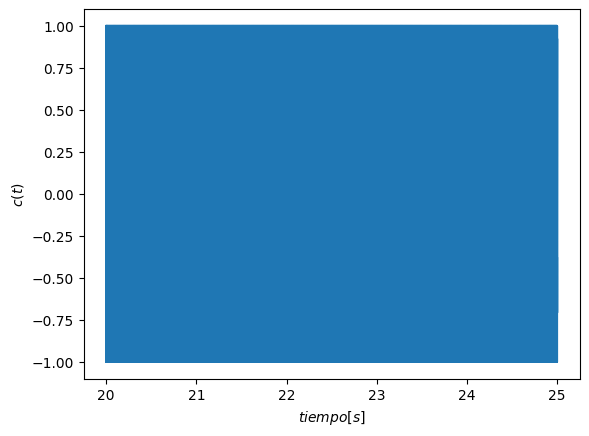

In [20]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

En este bloque de código, se realiza la transformada de Fourier de la señal portadora `c` utilizando `np.fft.rfft(c)`, lo que permite analizar su contenido en frecuencia. Primero, se grafica la magnitud del espectro de la portadora con `plt.plot(vf, abs(Cw))`, donde se utilizan las frecuencias correspondientes para el eje x y la magnitud en el eje y. El gráfico resultante se titula "Espectro Portadora", y se etiquetan los ejes con $f[Hz]$ y $|C[f]|$ para facilitar la interpretación. Luego, se grafica la fase del espectro con `plt.plot(vf, np.angle(Cw))`, mostrando cómo varía la fase en función de la frecuencia. Estos gráficos son fundamentales para entender las características espectrales de la señal portadora antes de su modulación.


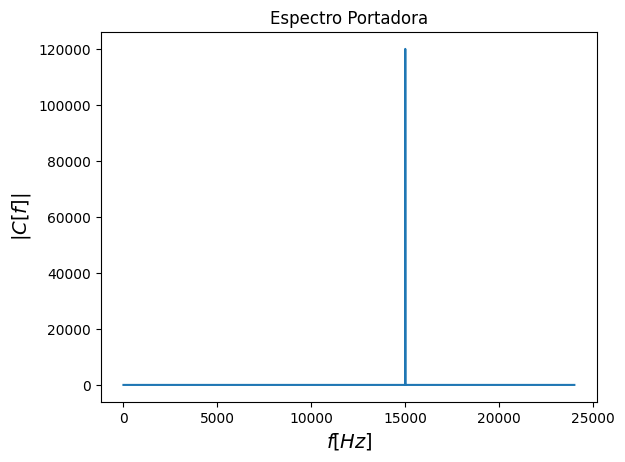

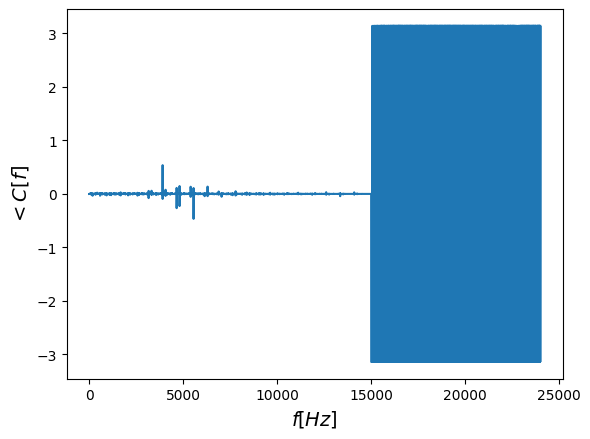

In [21]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

En este bloque de código, se define la señal modulada en amplitud (AM) utilizando la fórmula $y(t) = A1 \cdot m(t) \cdot c(t)$, donde $A1$ representa la amplitud de la señal modulada, $m(t)$ es la señal mensaje y \( c(t) \) es la señal portadora. Al multiplicar la señal mensaje por la portadora y escalarla con $A1$, se genera la señal modulada que contiene la información de la señal mensaje transmitida a través de la portadora.


In [22]:
#señal modulada
A1 = 2
y = A1*m*c #señal modulada en AM

Este bloque de código reproduce la señal modulada en amplitud (AM) que se ha generado previamente. Al utilizar la función `Audio`, se proporciona la señal modulada $y(t)$ junto con la frecuencia de muestreo $fs$. Esto permite escuchar cómo suena la señal modulada, que es una combinación de la señal mensaje y la portadora.


In [23]:
#repoducir modulada
Audio(y,rate=fs)

Este bloque de código grafica la señal modulada en el dominio del tiempo. Utiliza la función `plt.plot` para representar la señal $y(t)$ en función del tiempo $t$. Se etiquetan los ejes con las correspondientes unidades: tiempo en segundos y la señal modulada. Esta visualización ayuda a entender cómo varía la señal modulada a lo largo del tiempo.


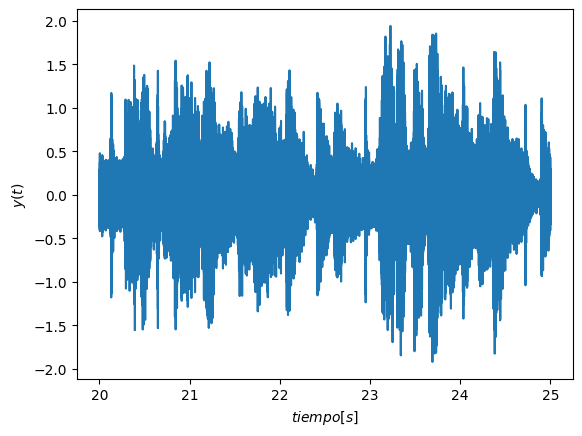

In [24]:
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

Este bloque de código calcula y grafica la transformada de Fourier de la señal modulada $y(t)$. Primero, se utiliza la función `np.fft.rfft` para obtener la representación en frecuencia de la señal. Luego, se generan dos gráficos: el primero muestra la magnitud del espectro $|Y[f]|$ en función de la frecuencia $f$, y el segundo representa la fase $\angle Y[f]$.

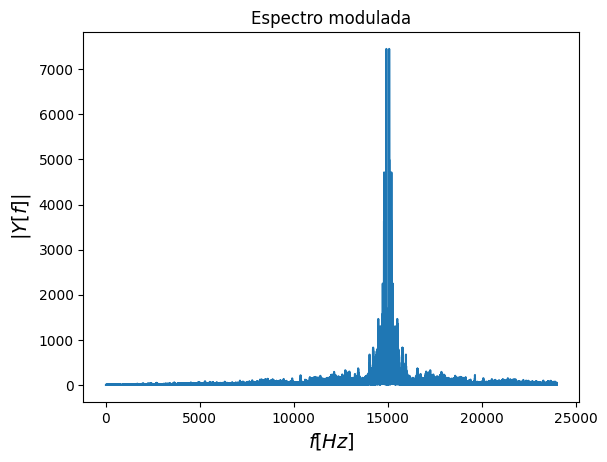

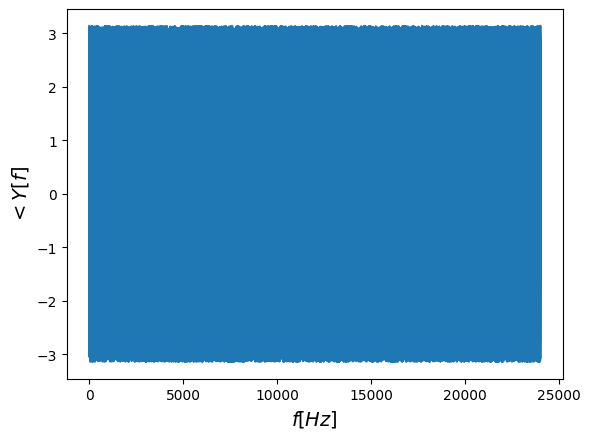

In [25]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

En este bloque de código, se realiza la demodulación de la señal modulada $y(t)$ multiplicándola por la señal portadora $c(t)$. El resultado se almacena en la variable $d$, que representa la señal demodulada. Posteriormente, se utiliza la función `Audio` para reproducir esta señal demodulada. Este proceso es fundamental en la recuperación de la señal original a partir de la señal modulada.


In [26]:
d = y*c #señal demodulada

#repoducir señal demodulada
Audio(d,rate=fs)

En este bloque de código, se grafica la señal demodulada $d(t)$ en función del tiempo. Se utiliza `plt.plot` para representar la señal, y se etiquetan los ejes con $ tiempo [s]$ en el eje x y $d(t)$ en el eje y. Esta visualización es útil para observar cómo se comporta la señal demodulada en el dominio del tiempo, permitiendo evaluar si la recuperación de la señal original fue exitosa.


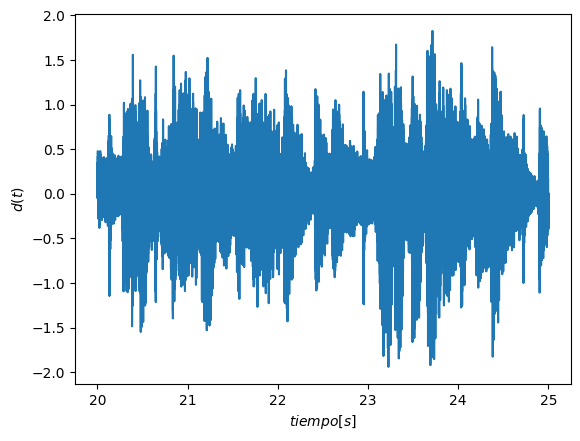

In [27]:
plt.plot(tt,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

En este bloque de código, se realiza la transformada de Fourier de la señal demodulada $d(t)$ utilizando la función `np.fft.rfft`. Se grafican tanto la magnitud como la fase del espectro. En la primera gráfica, se muestra la magnitud $|D[f]|$ en función de la frecuencia $f[Hz]$, lo que permite visualizar las componentes de frecuencia presentes en la señal demodulada. La segunda gráfica muestra la fase $<D[f]$, que proporciona información sobre la relación temporal de las diferentes frecuencias en la señal. Estas visualizaciones son importantes para analizar la calidad de la demodulación y entender cómo se recupera la información original.


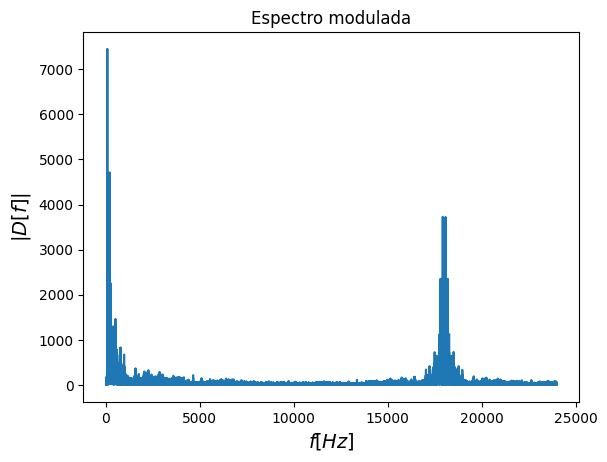

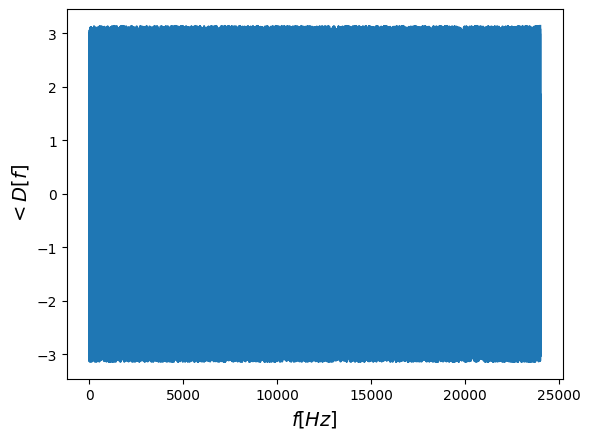

In [28]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|D[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<D[f]$',fontsize = 14)
plt.show()

###Filtro pasabajas (IIR)

Este código se utiliza para diseñar un filtro digital empleando la biblioteca `scipy.signal`. En primer lugar, se importan las funciones necesarias: `butter`, que se usa para crear filtros de Butterworth, y `freqz_zpk`, que permite calcular la respuesta en frecuencia del filtro. A continuación, se definen varios parámetros: `N`, que establece el orden del filtro, determinando su complejidad y la pendiente de la respuesta; `Wn`, que indica la frecuencia de corte del filtro en Hz (en este caso, 14950 Hz); `filt`, que especifica el tipo de filtro (pasa-baja en este caso); y `out`, que define el formato de salida de los parámetros del filtro, donde `'zpk'` significa que se devolverán ceros, polos y ganancia.

Luego, se utiliza la función `butter` para calcular los ceros, polos y ganancia del filtro según los parámetros especificados. Finalmente, la función `freqz_zpk` se utiliza para calcular la respuesta en frecuencia del filtro, utilizando los ceros, polos y ganancia obtenidos previamente. Este proceso permite analizar cómo el filtro afectará a las señales en diferentes frecuencias.


In [29]:
from scipy.signal import butter as bw
from scipy.signal import freqz_zpk


N = 10 #orden el filtro
Wn = 14950 #banda pasante
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = bw(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K

Este código define dos funciones para visualizar la respuesta en frecuencia de un filtro digital y la ubicación de sus ceros y polos en el plano Z.

La primera función, `plot_freq_response`, recibe el nombre del filtro, la frecuencia y la respuesta en frecuencia, así como el orden del filtro. Se crea una figura con un eje para graficar la amplitud en decibelios y otro eje (compartido) para graficar la fase. La amplitud se representa en color azul y la fase en verde, y se añaden etiquetas y una cuadrícula para mejorar la claridad de la visualización.

La segunda función, `show_zp`, se encarga de mostrar la ubicación de los ceros (representados por círculos azules) y los polos (representados por cruces rojas) en el plano Z. Se incluye un círculo unitario que representa la frontera de estabilidad para sistemas digitales, así como líneas que dividen los ejes reales e imaginarios. Esta visualización es fundamental para analizar la estabilidad y el comportamiento de un filtro digital en el dominio de la frecuencia.


In [30]:
from matplotlib.patches import Circle
#gráfica polos y ceros
def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()

  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')

  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

Este código llama a la función `show_zp` para visualizar la ubicación de los ceros y polos del filtro en el plano Z. Al proporcionar los ceros y polos calculados previamente, la función genera un gráfico que muestra los ceros como círculos azules y los polos como cruces rojas. El gráfico también incluye un círculo unitario, que representa la frontera de estabilidad para sistemas digitales, y líneas que indican los ejes reales e imaginarios. Esta visualización es crucial para entender la estabilidad y la respuesta en frecuencia del filtro diseñado.


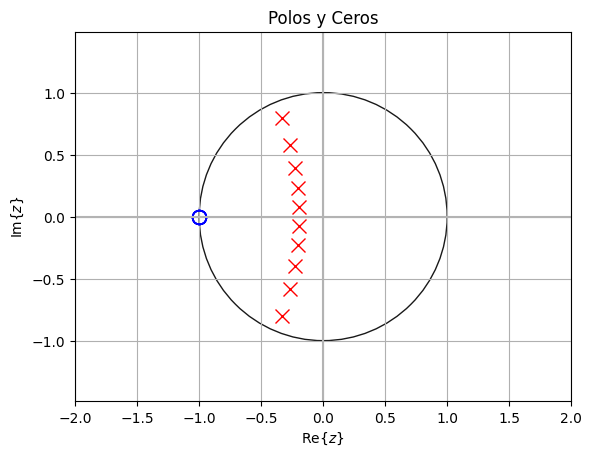

In [31]:
show_zp(zeros, poles, title='Polos y Ceros')#gráfica polos y ceros

El código utiliza la función `plot_freq_response` para graficar la respuesta en frecuencia del filtro Butterworth diseñado. En esta gráfica, se muestra la magnitud de la respuesta en decibelios (dB) en el eje vertical izquierdo y la fase en radianes en el eje vertical derecho. La frecuencia se presenta en el eje horizontal. Este gráfico es esencial para analizar cómo el filtro afecta diferentes componentes de frecuencia de la señal, permitiendo visualizar tanto el comportamiento en amplitud como en fase del filtro.


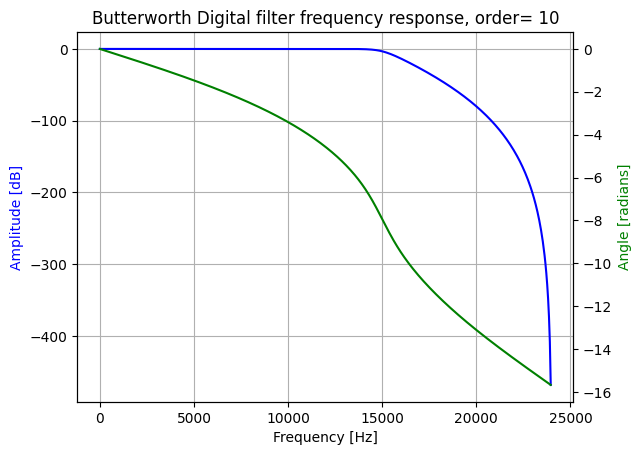

In [32]:
plot_freq_response('Butterworth', w, h, N) #gráfica de bode del filtro

El código filtra la señal demodulada `d` utilizando un filtro pasabajos de Butterworth. Primero, se generan los coeficientes del filtro (`num` y `den`) con la función `bw`, que determina el numerador y el denominador del filtro según el orden y la frecuencia de corte especificados. Luego, se aplica el filtro a la señal demodulada `d` usando `filtfilt`, que realiza un filtrado bidireccional para evitar el desfase de la señal. Finalmente, la señal filtrada `xf` se reescala dividiendo por la amplitud de la portadora `A1`, resultando en `me`, que es la señal final procesada.


In [33]:
#filtrar señal
from scipy.signal import filtfilt

num,den = bw(N, Wn, btype=filt, fs=fs)

xf = filtfilt(num, den, d, axis=0)#filtro pasabajos sobre señal demodulada d
me = (2/A1)*xf #señal reescalada

Este código reproduce la señal recuperada `me` utilizando la función `Audio` de la biblioteca `IPython.display`. Se especifica la frecuencia de muestreo `fs` para asegurar que la señal se reproduzca correctamente. Esta señal es el resultado del filtrado y reescalado de la señal demodulada, lo que permite escuchar la señal original que fue modulada en amplitud (AM).


In [34]:
#repoducir señal recuperada
Audio(me,rate=fs)

Este código grafica la señal recuperada `me` en función del tiempo. Utiliza `matplotlib` para crear la gráfica, donde el eje x representa el tiempo (en segundos) y el eje y muestra la amplitud de la señal recuperada. La etiqueta del eje y está marcada como m_e(t), que representa la señal de mensaje recuperada tras el proceso de demodulación y filtrado.

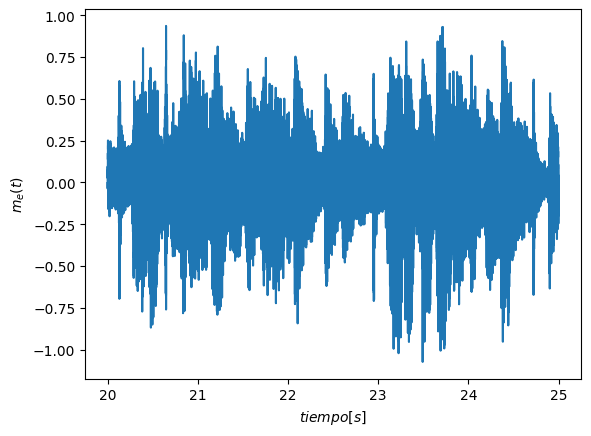

In [35]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

Finalmente este código realiza el análisis de la señal recuperada `me` utilizando la transformada de Fourier. Primero, calcula la transformada rápida de Fourier (FFT) de la señal recuperada, almacenando el resultado en `Mew`. Luego, grafica la magnitud del espectro, que se presenta en decibelios, mostrando cómo se distribuyen las frecuencias de la señal recuperada. En la segunda parte, grafica la fase del espectro, que indica la variación de la fase de cada componente de frecuencia en la señal recuperada. Ambas gráficas son útiles para evaluar la calidad y las características de la señal tras el proceso de demodulación y filtrado.


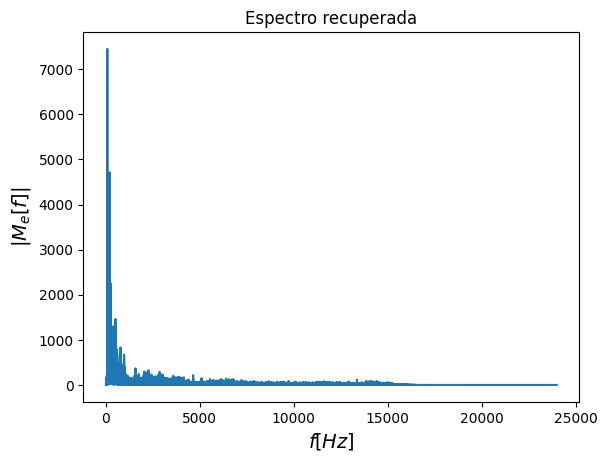

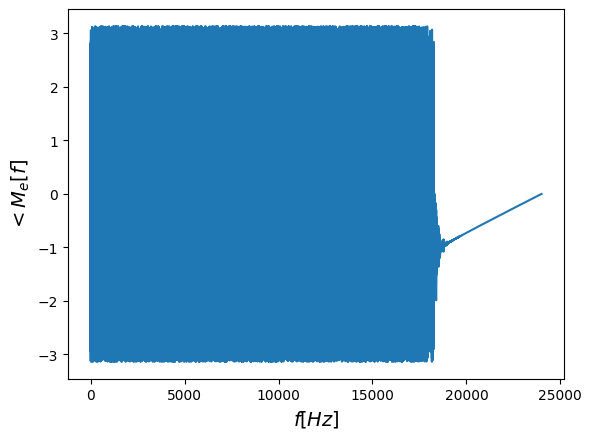

In [36]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()